# LIBRERIAS PARA GRÁFICAS
Actividad Lección 2 || Fundamentos de Big Data

Objetivos:
* Aprender más sobre librerías para gráficas
* Fomentar la proactividad y el aprendizaje autodidacta

Datos del alumno:
* Víctor Luque Martín
* Máster Avanzado en Programación en Python para Hacking, BigData y Machine Learning

# Primera parte
## Enunciado
Para comprobar de alguna manera que el/la alumno ha trabajado el manual, se pedirá que el alumno envíe el archivo .ipynb con la programación paso a paso de todo lo explicado en el manual relacionado con Gráficos rápidos con pandas.

## Solución
Instalación de dependencias con `pip install`
* pandas
* matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Creación dataframe de ejemplo

In [2]:
df = pd.DataFrame({'A':[1,2,3,4,5],'B':[5,4,3,2,1]})
df

,A,B
0,1,5
1,2,4
2,3,3
3,4,2
4,5,1


### Ploteamos el dataframe (default)

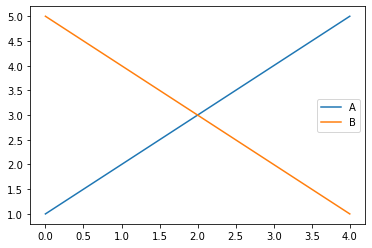

In [3]:
df.plot()
plt.show()

### Ploteamos un gráfico de barras

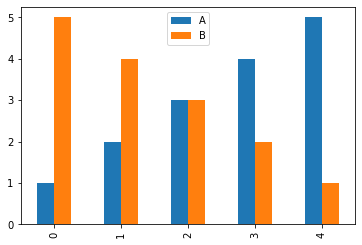

In [4]:
df.plot(kind = "bar")
plt.show()

### Ploteamos un gráfico de barras apilado

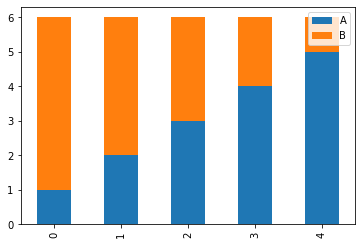

In [5]:
df.plot(kind = "bar", stacked = True)
plt.show()

### Ploteamos un gráfico de barras apilado, con rejilla y título

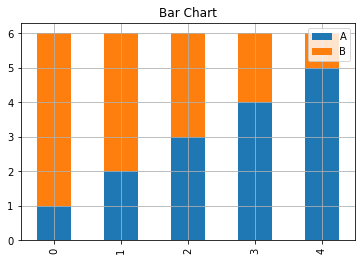

In [6]:
df.plot(kind = "bar", stacked = True, grid = True, title = "Bar Chart")
plt.show()

### Ploteamos un gráfico de barras del conteo de valores en "A"

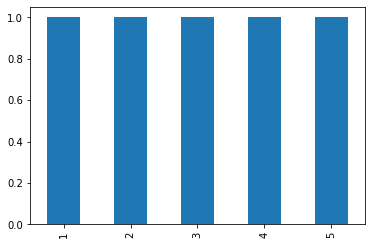

In [7]:
df.A.value_counts().plot(kind = "bar")
plt.show()

### Creación de un segundo dataframe

In [8]:
df_2 = pd.DataFrame({'x':[17,14,18,24,29,17,52,18],'y':[23,68,51,25,34,12,25,51]})
df_2

,x,y
0,17,23
1,14,68
2,18,51
3,24,25
4,29,34
5,17,12
6,52,25
7,18,51


### Ploteamos un gráfico de barras del conteo de valores en "y"

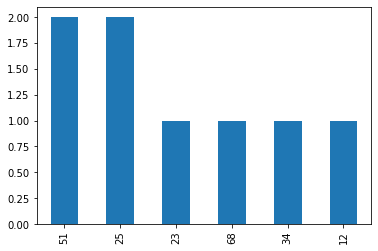

In [9]:
df_2.y.value_counts().plot(kind = "bar")
plt.show()

### Ploteamos un gráfico de barras del conteo de valores en "y" en dos colores

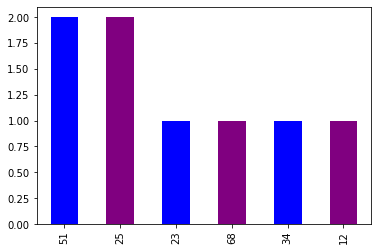

In [10]:
df_2.y.value_counts().plot(kind = "bar", color = ["blue", "purple"])
plt.show()

### Ploteamos un gráfico de barras del conteo de valores en "y" en cuatro colores

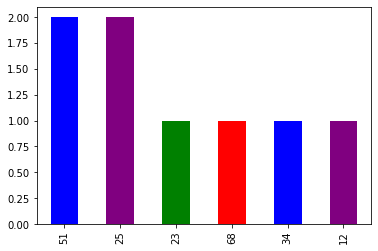

In [11]:
df_2.y.value_counts().plot(kind = "bar", color = ["blue", "purple", "green", "red"])
plt.show()

# Segunda parte
## Enunciado
Ggplot es una librería muy importante en “R” (lenguaje de programación).

En el caso de Python, lo que se va a pedir es que se aprenda de forma autodidacta a hacer las gráficas para Iris Dataset con “plotnine”.

Los colores no necesitan coincidir, pero la gráfica debería ser la misma (pétalo y/o sépalo).


Si fueras capaz de aprender algo de esta librería, pero, tal y como se ha comentado, no has sido capaz de hacer esas gráficas podrías perfectamente comentar en una celda de Jupyter qué has aprendido de forma autodidacta, y puedes añadir esas líneas de código, gráficas, para que se vea el esfuerzo y el aprendizaje realizado.

## Solución
Instalación de dependencias con `pip install plotnine`.

In [12]:
import plotnine as p9
from pathlib import Path

### Obtención de Iris Dataset
Lectura de fichero ubicado en la carpeta "resources".

In [13]:
BASE_DIR = Path().resolve()
df_iris = pd.read_csv(BASE_DIR / "resources/iris.csv")
df_iris.head()

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


### Plotnine gráfica del sépalo
Haciendo uso de la libreria plotnine, es posible definir una gráfica a partir de un dataframe.
Adicionalmente, es recomendable mapear el eje "x" y el eje "y" para la representación de los datos, siendo la leyenda el tipo de especie.

Tras definir el conjunto de datos y el mapeo se debe definir el tipo de gráfico a representar; en el caso de un gráfico de puntos (scatter), se añade un objeto `geom_point` al objeto `ggplot`. 

A continuación se muestra como representar con plotnine las gráficas del sépalo del Iris Dataset.

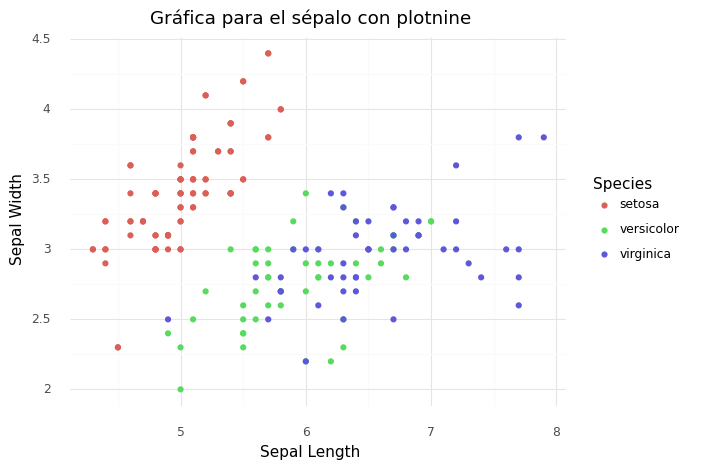

<ggplot: (179711993932)>

In [14]:
(p9.ggplot(df_iris, p9.aes(x="sepal_length", y="sepal_width", color = "factor(species)")) +
    p9.geom_point() +  
    p9.theme_bw() +
    p9.theme_minimal() +
    p9.ggtitle("Gráfica para el sépalo con plotnine") +
    p9.xlab("Sepal Length") +
    p9.ylab("Sepal Width") +
    p9.labs(color = "Species"))

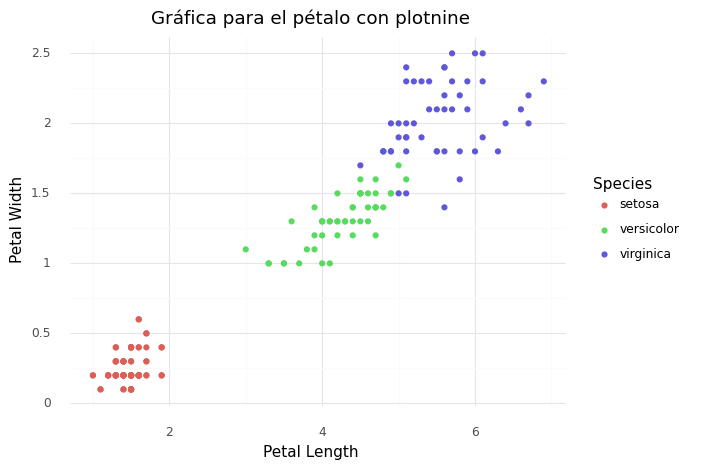

<ggplot: (179712067226)>

In [15]:
(p9.ggplot(df_iris, p9.aes(x="petal_length", y="petal_width", color = "factor(species)")) +
    p9.geom_point() +  
    p9.theme_bw() +
    p9.theme_minimal() +
    p9.ggtitle("Gráfica para el pétalo con plotnine") +
    p9.xlab("Petal Length") +
    p9.ylab("Petal Width") +
    p9.labs(color = "Species"))

### Comparativa utilizando matplotlib y plotnine
A continuación, y para asegurarnos que el resultado es el correcto, he realizado una comparativa entre "matplotlib" y "plotnine" observando los mismos resultados en ambas librerías.

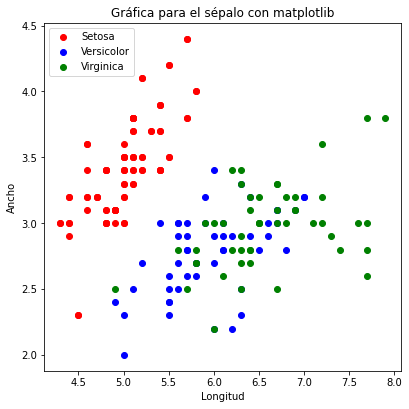

In [16]:
df_setosa = df_iris[df_iris["species"] == "setosa"]
df_versicolor = df_iris[df_iris["species"] == "versicolor"]
df_virginica = df_iris[df_iris["species"] == "virginica"]

fig = plt.figure(figsize=(6.4, 6.4))
ax = fig.add_subplot(111)
ax.scatter(df_setosa["sepal_length"], df_setosa["sepal_width"], color="red", label="Setosa")
ax.scatter(df_versicolor["sepal_length"], df_versicolor["sepal_width"], color="blue", label="Versicolor")
ax.scatter(df_virginica["sepal_length"], df_virginica["sepal_width"], color="green", label="Virginica")
plt.legend(loc = "upper left")
plt.title("Gráfica para el sépalo con matplotlib")
plt.xlabel("Longitud")
plt.ylabel("Ancho")
plt.show()


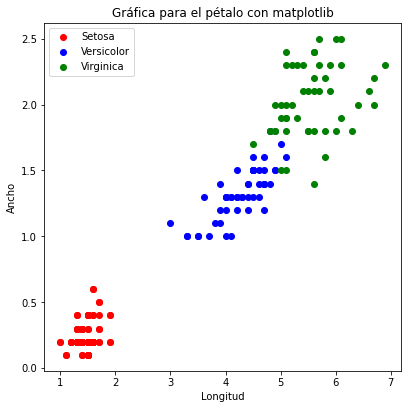

In [17]:
fig = plt.figure(figsize=(6.4, 6.4))
ax = fig.add_subplot(111)
ax.scatter(df_setosa["petal_length"], df_setosa["petal_width"], color="red", label="Setosa")
ax.scatter(df_versicolor["petal_length"], df_versicolor["petal_width"], color="blue", label="Versicolor")
ax.scatter(df_virginica["petal_length"], df_virginica["petal_width"], color="green", label="Virginica")
plt.legend(loc = "upper left")
plt.title("Gráfica para el pétalo con matplotlib")
plt.xlabel("Longitud")
plt.ylabel("Ancho")
plt.show()

# Tercera parte
## Enunciado
Tableau es una herramienta mencionada en los apuntes.

¿Existe alguna forma de programar, o de integrar Python con Tableau?

Copia y pega este enunciado en una celda, teniendo en cuenta que no es código, sino texto.

Si no hay librería alguna que de alguna forma me relacione Tableau con Python como decimos de la forma que sea, indica este propio enunciado (en una celda) y como respuesta (en la celda siguiente): comenta brevemente tu comentario: “no hay nada de Python relacionado con Tableau”.

Si es que sí, indicar el nombre de la herramienta, y una breve explicación.

Puedes añadir incluso un ejemplo.

## Solución
Sí, existe una herramienta que permite trabajar con Python y Tableau, la librería se llama [TabPy](https://github.com/tableau/TabPy) , la cual consiste en un servidor de Python de Tableau que permite a los usuarios ejecutar secuencias de comandos de Python y funciones guardadas a través de los cálculos de tablas de Tableau.

Para configurar el servidor TabPy, es recomendable iniciarlo a partir de un fichero de configuración `tabpy --config=ruta/fichero.conf` o sin especificar este `tabpy`. Para más detalle sobre como configurar el servidor visitar [esta página](https://github.com/tableau/TabPy/blob/master/docs/server-config.md).

Adicionalmente, es posible crear una conexión manual con Tableau desde `tabpy_tools` de la siguiente manera:

```python
from tabpy.tabpy_tools.client import Client

client = Client('http://localhost:9004/')
```

Este y más ejemplos se pueden encontrar [aquí](https://github.com/tableau/TabPy/blob/master/docs/tabpy-tools.md).

# Cuarta parte
## Enunciado
Se han mencionado más cosas.

Se pedirá en este caso que se tome uno de ellos, y se trate de aprender de forma autodidacta, se pedirá que en el mismo archivo .ipynb se presente algo relacionado con Bokeh preferentemente, o de Power BI.

No es importante la elección, pudiera ser Folium, Savvy, o incluso alguna cosa no vista.

Pista: No tiene por qué ser algo complejo. Podría ser algo relacionado, similar a la información que te encontrarás en sus respectivos sitios web.

## Solución
Para este apartado se ha seleccionado Bokeh para representar los datos dentro de Iris Dataset, primeramente se debe instalar el respectivo paquete con `pip install bokeh`.

In [18]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.layouts import gridplot
from bokeh.io import output_notebook

>Nota:<br>
>   Para poder trabajar con Pandas en Bokeh, es necesario convertir el Dataframe un objeto de tipo `bokeh.models.ColumnDataSource`.<br>
>   Para utilizar Bokeh dentro de Jupyter Notebook es necesario ejecutar previamente la función `bokeh.io.output_notebook`.

In [19]:
output_notebook()
source_setosa = ColumnDataSource(data=df_setosa)
source_versicolor = ColumnDataSource(data=df_versicolor)
source_virginica = ColumnDataSource(data=df_virginica)

Loading BokehJS ...

### Bokeh gráfica del sépalo

In [20]:
p = figure(title="Gráfica para el sépalo con bokeh", x_axis_label='Longitud', y_axis_label='Ancho', sizing_mode="stretch_both")
p.circle(x="sepal_length", y="sepal_width", source=source_setosa, color="red", legend_label="Setosa", size=10)
p.circle(x="sepal_length", y="sepal_width", source=source_versicolor, color="blue", legend_label="Versicolor", size=10)
p.circle(x="sepal_length", y="sepal_width", source=source_virginica, color="green", legend_label="Virginica", size=10)
p.legend.border_line_color = "black"
p.legend.location = "top_left"
show(gridplot([[p]]))

### Bokeh gráfica del pétalo

In [21]:
p = figure(title="Gráfica para el pétalo con bokeh", x_axis_label='Longitud', y_axis_label='Ancho', sizing_mode="stretch_both")
p.circle(x="petal_length", y="petal_width", source=source_setosa, color="red", legend_label="Setosa", size=10)
p.circle(x="petal_length", y="petal_width", source=source_versicolor, color="blue", legend_label="Versicolor", size=10)
p.circle(x="petal_length", y="petal_width", source=source_virginica, color="green", legend_label="Virginica", size=10)
p.legend.border_line_color = "black"
p.legend.location = "top_left"
show(gridplot([[p]]))